In [9]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import os

plt.rcParams.update({"font.size": 16})


In [3]:
plot_dir = "../../plots/inference_analysis/03_31_ak8/09_22_checks/"
os.system(f"mkdir -p {plot_dir}")

samples = ["bulkg_hflat", "bulkg_hsm", "HHbbVV", "qcd"]


In [4]:
events_dict = {}

for sample in samples:
    print(sample)
    events_dict[sample] = uproot.open(f"../../inferences/03_31_ak8/{sample}.root:Events").arrays()


bulkg_hflat
bulkg_hsm
HHbbVV
qcd


In [30]:
events_dict["HHbbVV"].fields

['fj_isQCDb',
 'score_fj_isQCDb',
 'fj_isQCDbb',
 'score_fj_isQCDbb',
 'fj_isQCDc',
 'score_fj_isQCDc',
 'fj_isQCDcc',
 'score_fj_isQCDcc',
 'fj_isQCDothers',
 'score_fj_isQCDothers',
 'fj_H_VV_4q_3q',
 'score_fj_H_VV_4q_3q',
 'fj_H_VV_4q_4q',
 'score_fj_H_VV_4q_4q',
 'fj_pt',
 'fj_eta',
 'fj_phi',
 'fj_mass',
 'fj_subjet1_pt',
 'fj_subjet1_eta',
 'fj_subjet1_phi',
 'fj_subjet1_mass',
 'fj_subjet2_pt',
 'fj_subjet2_eta',
 'fj_subjet2_phi',
 'fj_subjet2_mass',
 'fj_msoftdrop',
 'fj_dR_V',
 'fj_dR_Vstar',
 'fj_PN_H4qvsQCD',
 'fj_genRes_mass',
 'fj_genVstar_mass',
 'fj_genV_pt',
 'fj_genVstar_pt',
 'fj_nprongs',
 'fj_H_VV_4q',
 'target_mass']

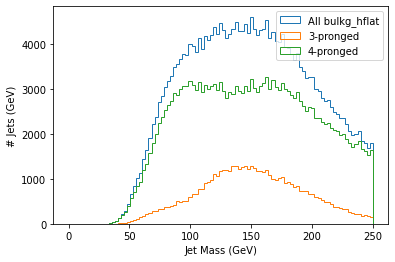

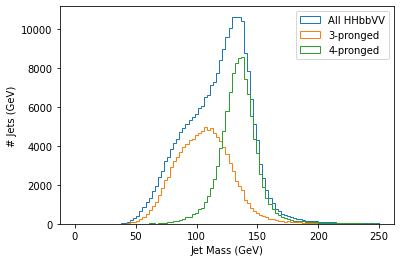

In [5]:
sigs = ["bulkg_hflat", "HHbbVV"]
for sig in sigs:
    events = events_dict[sig]

    plt.figure()
    _ = plt.hist(events["fj_mass"], np.linspace(0, 250, 100), histtype="step", label=f"All {sig}")
    _ = plt.hist(
        events["fj_mass"][events["fj_H_VV_4q_3q"] == 1],
        np.linspace(0, 250, 100),
        histtype="step",
        label="3-pronged",
    )
    _ = plt.hist(
        events["fj_mass"][events["fj_H_VV_4q_4q"] == 1],
        np.linspace(0, 250, 100),
        histtype="step",
        label="4-pronged",
    )
    plt.legend()
    plt.xlabel("Jet Mass (GeV)")
    plt.ylabel("# Jets (GeV)")
    plt.savefig(f"{plot_dir}/{sig}_fj_mass.pdf")


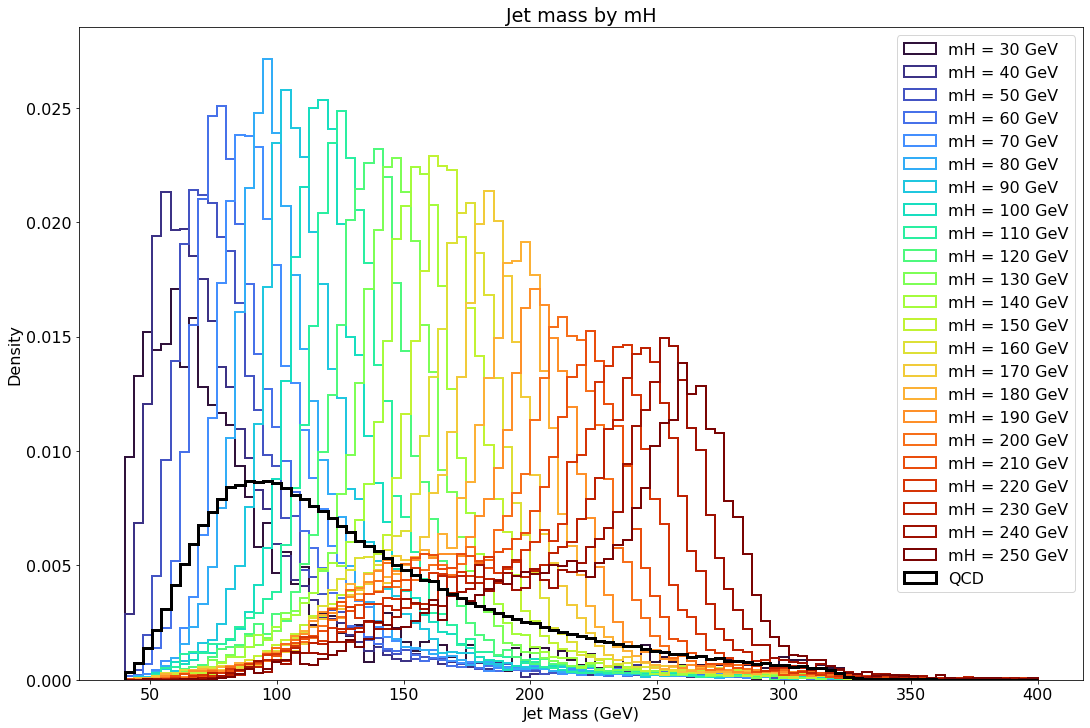

In [39]:
sig = "bulkg_hflat"
events = events_dict[sig]

mass_range = list(range(30, 251, 10))
color = cm.turbo(np.linspace(0, 1, len(mass_range)))

plt.figure(figsize=(18, 12))
for i, (m, c) in enumerate(zip(mass_range, color)):
    _ = plt.hist(
        events["fj_mass"][(events["fj_genRes_mass"] == m)],
        np.linspace(40, 400, 100),
        histtype="step",
        label=f"mH = {m} GeV",
        linewidth=2,
        color=c,
        density=True,
    )
_ = plt.hist(
        events_dict["qcd"]["fj_mass"],
        np.linspace(40, 400, 100),
        histtype="step",
        label=f"QCD",
        linewidth=3,
        color="black",
        density=True,
    )

plt.legend()
plt.xlabel("Jet Mass (GeV)")
plt.ylabel("Density")
plt.title("Jet mass by mH")
plt.savefig(f"{plot_dir}/{sig}_fj_mass_by_mh.pdf")


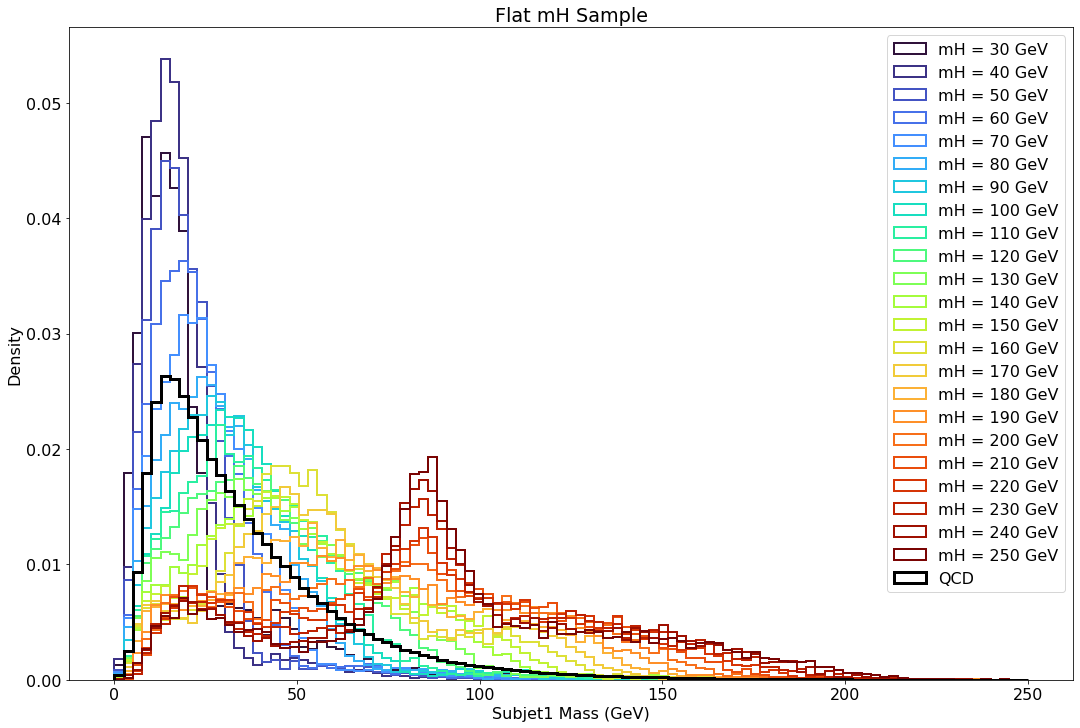

In [24]:
plt.figure(figsize=(18, 12))
for i, (m, c) in enumerate(zip(mass_range, color)):
    _ = plt.hist(
        events["fj_subjet1_mass"][(events["fj_genRes_mass"] == m)],
        np.linspace(0, 250, 100),
        histtype="step",
        label=f"mH = {m} GeV",
        linewidth=2,
        color=c,
        density=True,
    )
_ = plt.hist(
        events_dict["qcd"]["fj_subjet1_mass"],
        np.linspace(0, 250, 100),
        histtype="step",
        label=f"QCD",
        linewidth=3,
        color="black",
        density=True,
    )
plt.legend()
plt.xlabel("Subjet1 Mass (GeV)")
plt.ylabel("Density")
plt.title("Flat mH Sample")
plt.savefig(f"{plot_dir}/{sig}_fj_subjet1_mass_by_mh.pdf")


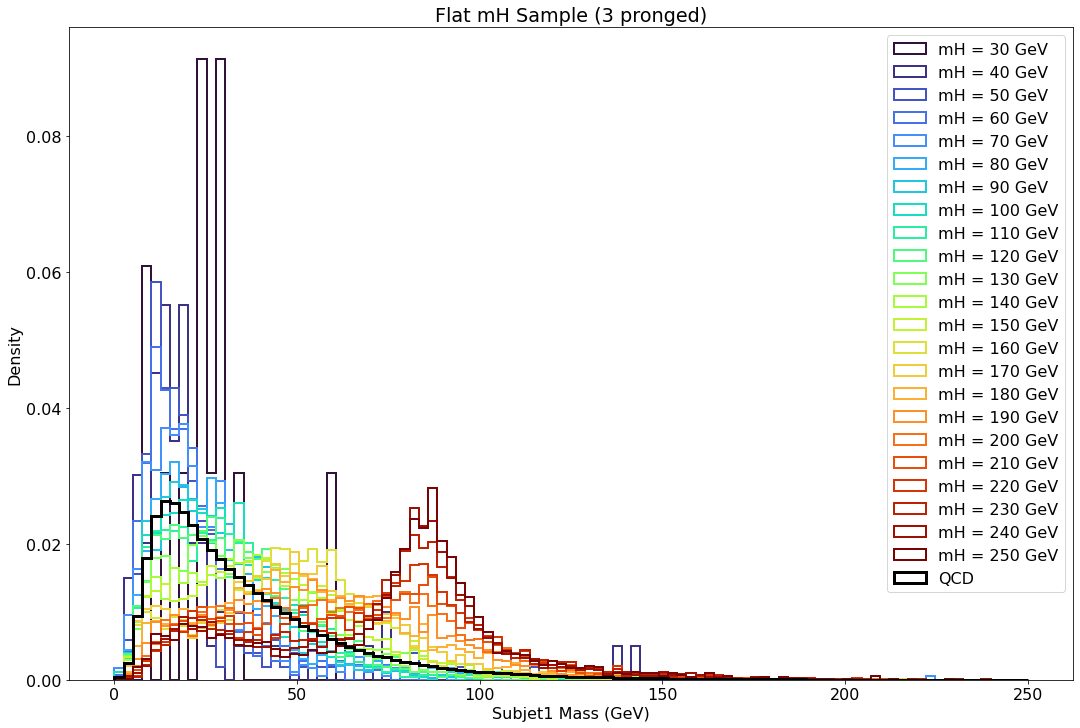

In [31]:
plt.figure(figsize=(18, 12))
for i, (m, c) in enumerate(zip(mass_range, color)):
    _ = plt.hist(
        events["fj_subjet1_mass"][(events["fj_genRes_mass"] == m) * (events["fj_H_VV_4q_3q"] == 1)],
        np.linspace(0, 250, 100),
        histtype="step",
        label=f"mH = {m} GeV",
        linewidth=2,
        color=c,
        density=True,
    )
_ = plt.hist(
        events_dict["qcd"]["fj_subjet1_mass"],
        np.linspace(0, 250, 100),
        histtype="step",
        label=f"QCD",
        linewidth=3,
        color="black",
        density=True,
    )
plt.legend()
plt.xlabel("Subjet1 Mass (GeV)")
plt.ylabel("Density")
plt.title("Flat mH Sample (3 pronged)")
plt.savefig(f"{plot_dir}/{sig}_fj_subjet1_mass_3_pronged_by_mh.pdf")


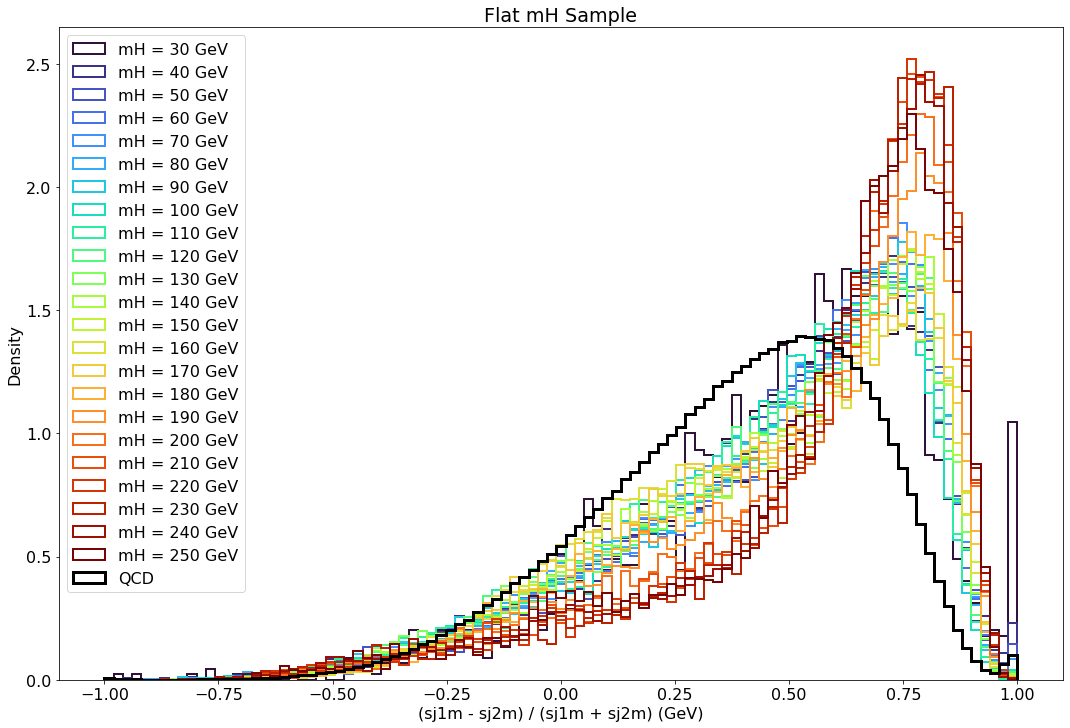

In [26]:
plt.figure(figsize=(18, 12))
for i, (m, c) in enumerate(zip(mass_range, color)):
    selector = (events["fj_genRes_mass"] == m)
    sj1m = events["fj_subjet1_mass"][selector]
    sj2m = events["fj_subjet2_mass"][selector]
    _ = plt.hist(
        (sj1m - sj2m) / (sj1m + sj2m),
        np.linspace(-1, 1, 100),
        histtype="step",
        label=f"mH = {m} GeV",
        linewidth=2,
        color=c,
        density=True,
    )
sj1m = events_dict["qcd"]["fj_subjet1_mass"]
sj2m = events_dict["qcd"]["fj_subjet2_mass"]
_ = plt.hist(
        (sj1m - sj2m) / (sj1m + sj2m),
        np.linspace(-1, 1, 100),
        histtype="step",
        label=f"QCD",
        linewidth=3,
        color="black",
        density=True,
    )
plt.legend(loc=2)
plt.xlabel("(sj1m - sj2m) / (sj1m + sj2m) (GeV)")
plt.ylabel("Density")
plt.title("Flat mH Sample")
plt.savefig(f"{plot_dir}/{sig}_fj_sj_mass_asymm_by_mh.pdf")


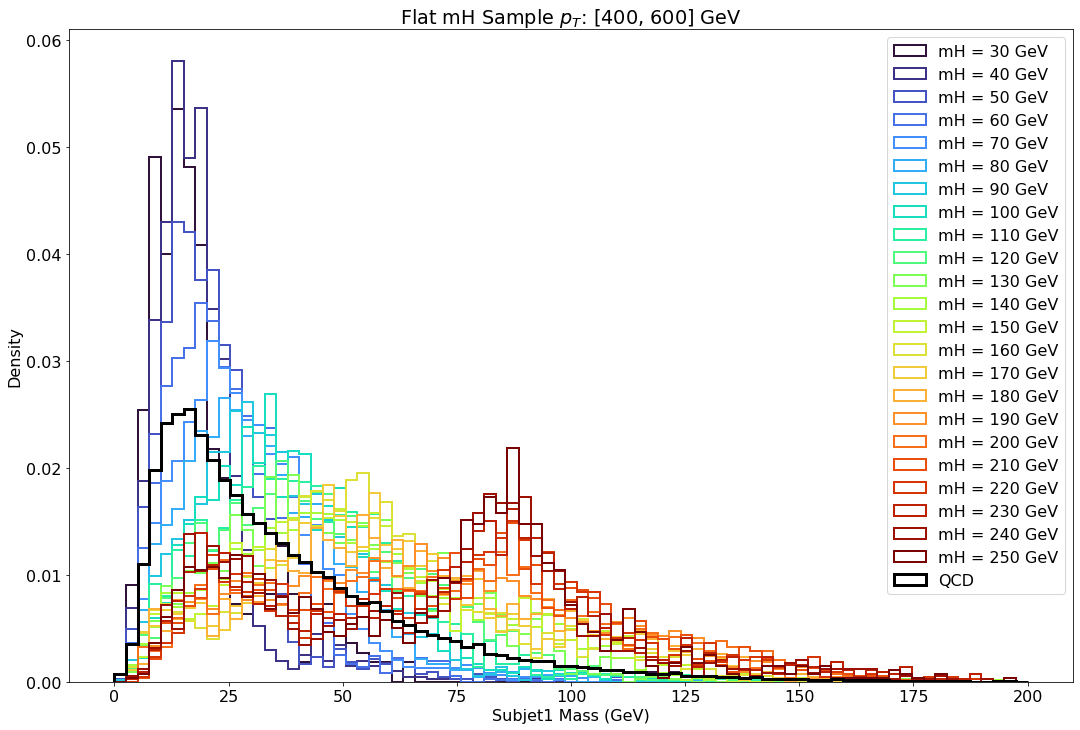

In [27]:
plt.figure(figsize=(18, 12))
for i, (m, c) in enumerate(zip(mass_range, color)):
    _ = plt.hist(
        events["fj_subjet1_mass"][
            (events["fj_genRes_mass"] == m)
            * (events["fj_pt"] >= 400)
            * (events["fj_pt"] < 600)
        ],
        np.linspace(0, 200, 80),
        histtype="step",
        label=f"mH = {m} GeV",
        linewidth=2,
        color=c,
        density=True,
    )
_ = plt.hist(
        events_dict["qcd"]["fj_subjet1_mass"][(events["fj_pt"] >= 400) * (events["fj_pt"] < 600)],
        np.linspace(0, 200, 80),
        histtype="step",
        label=f"QCD",
        linewidth=3,
        color="black",
        density=True,
    )
plt.legend()
plt.xlabel("Subjet1 Mass (GeV)")
plt.ylabel("Density")
plt.title("Flat mH Sample $p_T$: [400, 600] GeV")
plt.savefig(f"{plot_dir}/{sig}_fj_subjet1_mass_by_mh.pdf")


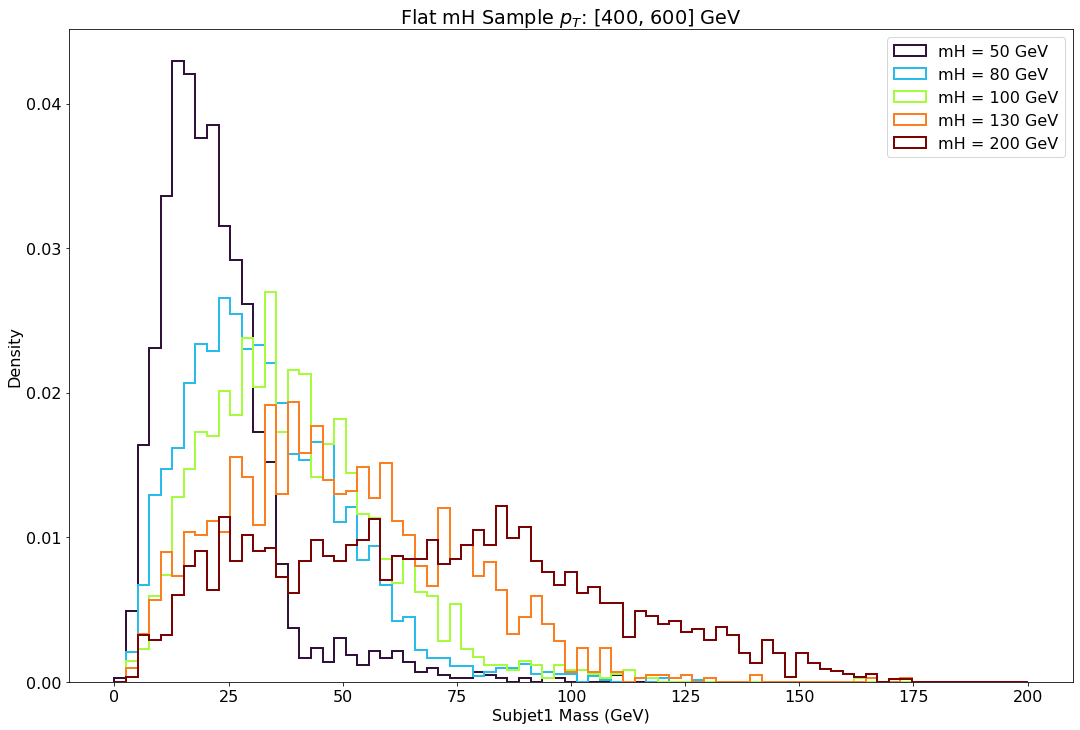

In [37]:
mass_points = [50, 80, 100, 130, 200]

n = len(mass_points)
color = cm.turbo(np.linspace(0, 1, n))

plt.figure(figsize=(18, 12))
for i, c in zip(range(n), color):
    _ = plt.hist(
        events["fj_subjet1_mass"][
            (events["fj_genRes_mass"] == mass_points[i])
            * (events["fj_pt"] >= 400)
            * (events["fj_pt"] < 600)
        ],
        np.linspace(0, 200, 80),
        histtype="step",
        label=f"mH = {mass_points[i]} GeV",
        linewidth=2,
        color=c,
        density=True,
    )
plt.legend()
plt.xlabel("Subjet1 Mass (GeV)")
plt.ylabel("Density")
plt.title("Flat mH Sample $p_T$: [400, 600] GeV")
plt.savefig(f"{plot_dir}/{sig}_fj_subjet1_mass_by_mh_points.pdf")


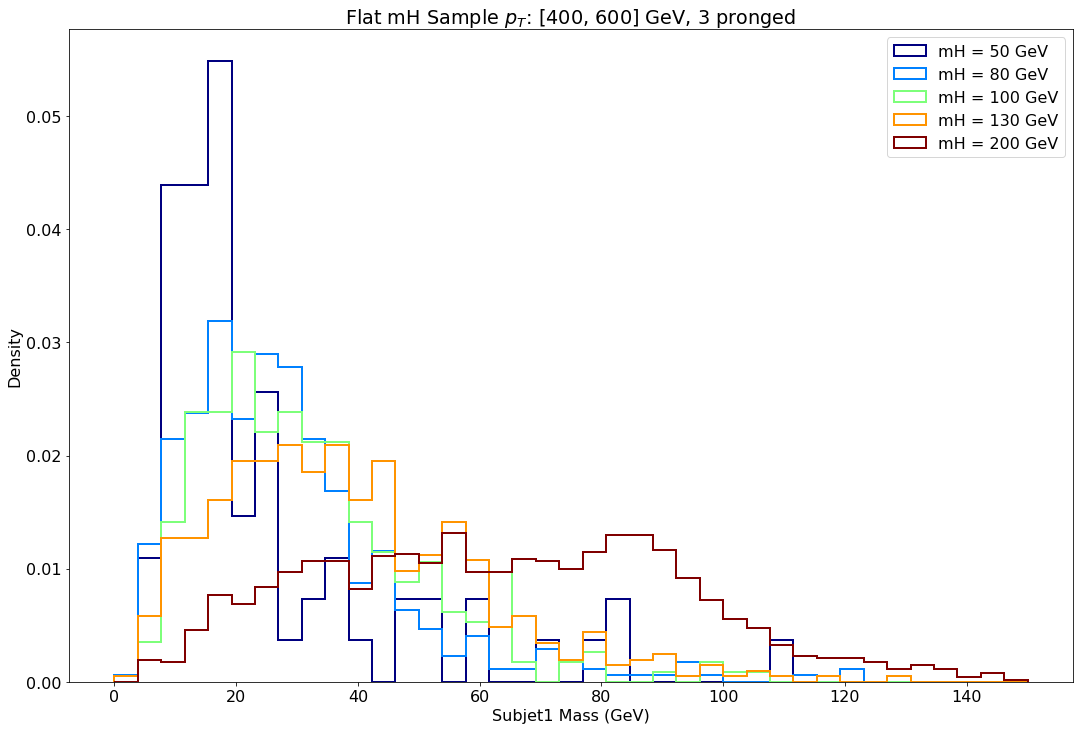

In [43]:
mass_points = [50, 80, 100, 130, 200]

n = len(mass_points)
color = cm.jet(np.linspace(0, 1, n))

plt.figure(figsize=(18, 12))
for i, c in zip(range(n), color):
    _ = plt.hist(
        events["fj_subjet1_mass"][
            (events["fj_genRes_mass"] == mass_points[i])
            * (events["fj_pt"] >= 400)
            * (events["fj_pt"] < 600)
            * (events["fj_nprongs"] == 3)
        ],
        np.linspace(0, 150, 40),
        histtype="step",
        label=f"mH = {mass_points[i]} GeV",
        linewidth=2,
        color=c,
        density=True,
    )
plt.legend()
plt.xlabel("Subjet1 Mass (GeV)")
plt.ylabel("Density")
plt.title("Flat mH Sample $p_T$: [400, 600] GeV, 3 pronged")
plt.savefig(f"{plot_dir}/{sig}_fj_subjet1_mass_by_mh_points_3_prongs_pt_400_600.pdf")


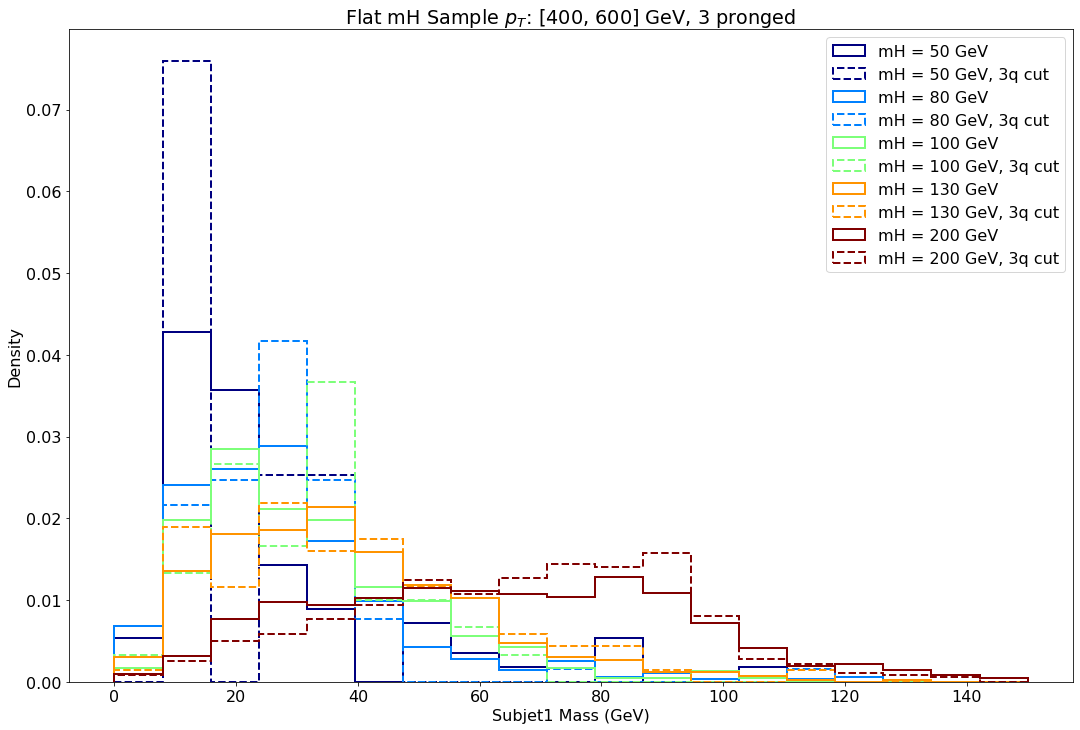

In [55]:
mass_points = [50, 80, 100, 130, 200]

n = len(mass_points)
color = cm.jet(np.linspace(0, 1, n))

plt.figure(figsize=(18, 12))
for i, c in zip(range(n), color):
    _ = plt.hist(
        events["fj_subjet1_mass"][
            (events["fj_genRes_mass"] == mass_points[i])
            * (events["fj_pt"] >= 400)
            * (events["fj_pt"] < 600)
            * (events["fj_nprongs"] == 3)
        ],
        np.linspace(0, 150, 20),
        histtype="step",
        label=f"mH = {mass_points[i]} GeV",
        linewidth=2,
        color=c,
        density=True,
    )
    _ = plt.hist(
        events["fj_subjet1_mass"][
            (events["fj_genRes_mass"] == mass_points[i])
            * (events["fj_pt"] >= 400)
            * (events["fj_pt"] < 600)
            * (events["fj_nprongs"] == 3)
            * (events["score_fj_H_VV_4q_3q"] > 0.5)
        ],
        np.linspace(0, 150, 20),
        histtype="step",
        label=f"mH = {mass_points[i]} GeV, 3q cut",
        linewidth=2,
        linestyle="dashed",
        color=c,
        density=True,
    )
plt.legend()
plt.xlabel("Subjet1 Mass (GeV)")
plt.ylabel("Density")
plt.title("Flat mH Sample $p_T$: [400, 600] GeV, 3 pronged")
plt.savefig(f"{plot_dir}/{sig}_fj_subjet1_mass_by_mh_points_3_prongs_pt_400_600.pdf")


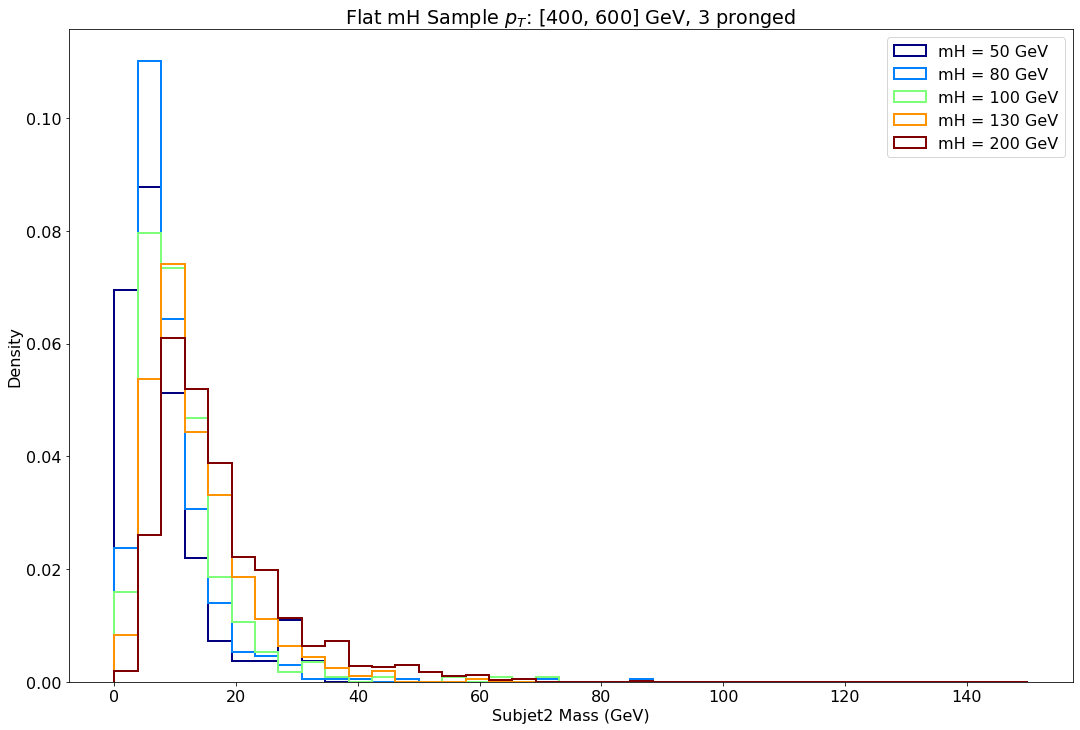

In [48]:
mass_points = [50, 80, 100, 130, 200]

n = len(mass_points)
color = cm.jet(np.linspace(0, 1, n))

plt.figure(figsize=(18, 12))
for i, c in zip(range(n), color):
    _ = plt.hist(
        events["fj_subjet2_mass"][
            (events["fj_genRes_mass"] == mass_points[i])
            * (events["fj_pt"] >= 400)
            * (events["fj_pt"] < 600)
            * (events["fj_nprongs"] == 3)
        ],
        np.linspace(0, 150, 40),
        histtype="step",
        label=f"mH = {mass_points[i]} GeV",
        linewidth=2,
        color=c,
        density=True,
    )
plt.legend()
plt.xlabel("Subjet2 Mass (GeV)")
plt.ylabel("Density")
plt.title("Flat mH Sample $p_T$: [400, 600] GeV, 3 pronged")
plt.savefig(f"{plot_dir}/{sig}_fj_subjet2_mass_by_mh_points_3_prongs_pt_400_600_3q_cut.pdf")


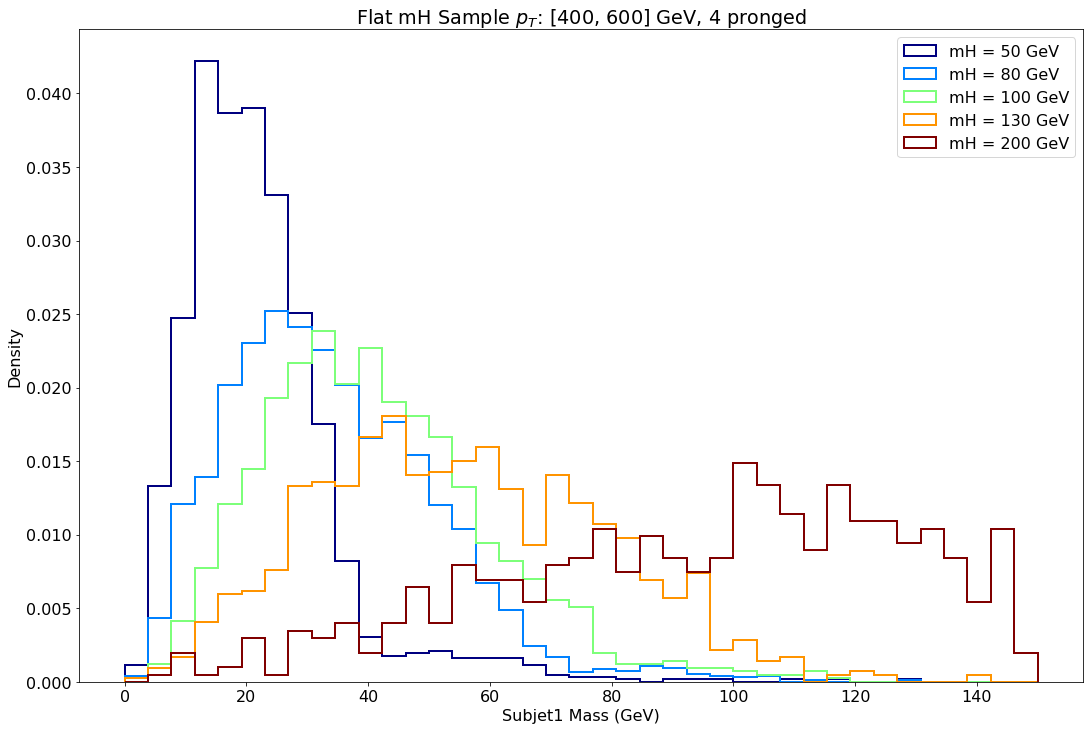

In [45]:
mass_points = [50, 80, 100, 130, 200]

n = len(mass_points)
color = cm.jet(np.linspace(0, 1, n))

plt.figure(figsize=(18, 12))
for i, c in zip(range(n), color):
    _ = plt.hist(
        events["fj_subjet1_mass"][
            (events["fj_genRes_mass"] == mass_points[i])
            * (events["fj_pt"] >= 400)
            * (events["fj_pt"] < 600)
            * (events["fj_nprongs"] == 4)
        ],
        np.linspace(0, 150, 40),
        histtype="step",
        label=f"mH = {mass_points[i]} GeV",
        linewidth=2,
        color=c,
        density=True,
    )
plt.legend()
plt.xlabel("Subjet1 Mass (GeV)")
plt.ylabel("Density")
plt.title("Flat mH Sample $p_T$: [400, 600] GeV, 4 pronged")
plt.savefig(f"{plot_dir}/{sig}_fj_subjet1_mass_by_mh_points_4_prongs_pt_400_600.pdf")


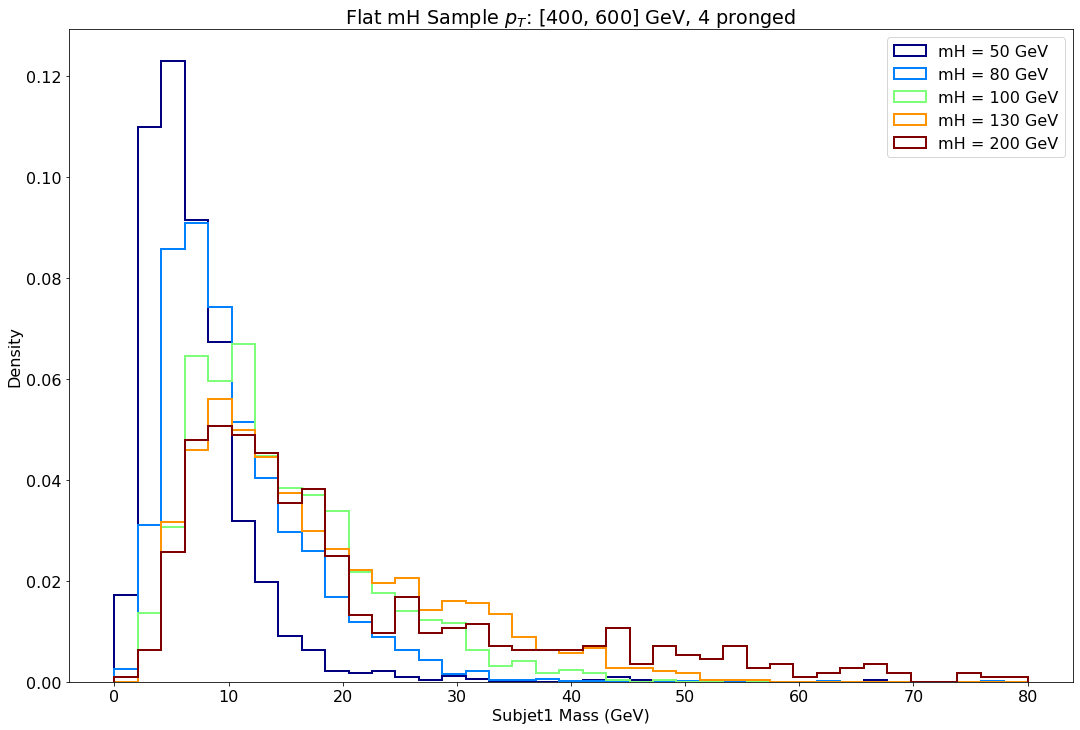

In [47]:
mass_points = [50, 80, 100, 130, 200]

n = len(mass_points)
color = cm.jet(np.linspace(0, 1, n))

plt.figure(figsize=(18, 12))
for i, c in zip(range(n), color):
    _ = plt.hist(
        events["fj_subjet2_mass"][
            (events["fj_genRes_mass"] == mass_points[i])
            * (events["fj_pt"] >= 400)
            * (events["fj_pt"] < 600)
            * (events["fj_nprongs"] == 4)
        ],
        np.linspace(0, 80, 40),
        histtype="step",
        label=f"mH = {mass_points[i]} GeV",
        linewidth=2,
        color=c,
        density=True,
    )
plt.legend()
plt.xlabel("Subjet1 Mass (GeV)")
plt.ylabel("Density")
plt.title("Flat mH Sample $p_T$: [400, 600] GeV, 4 pronged")
plt.savefig(f"{plot_dir}/{sig}_fj_subjet2_mass_by_mh_points_4_prongs_pt_400_600.pdf")


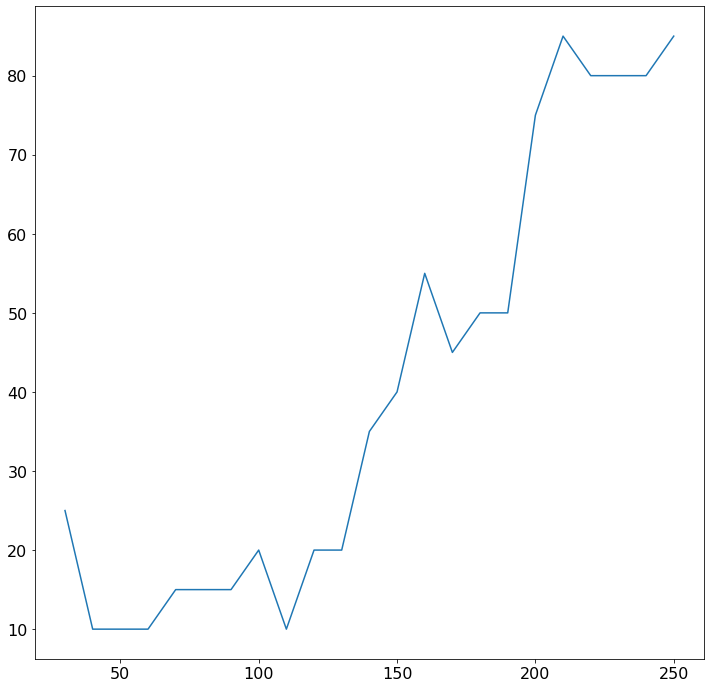

In [53]:
subjet_mass_peak_3_prongs = []
mass_bins = np.linspace(0, 100, 21)

for mp in mass_range:
    sj_mass = (
        events["fj_subjet1_mass"][
            (events["fj_genRes_mass"] == mp)
            # * (events["fj_pt"] >= 400)
            # * (events["fj_pt"] < 600)
            * (events["fj_nprongs"] == 3)
        ],
    )
    subjet_mass_peak_3_prongs.append(mass_bins[np.argmax(np.histogram(sj_mass, mass_bins)[0])])

plt.figure(figsize=(12, 12))
plt.plot(mass_range, subjet_mass_peak_3_prongs, label="Subjet1 mass peak")
plt.savefig(f"{plot_dir}/{sig}_fj_subjet1_mass_peak_3_pronged.pdf")

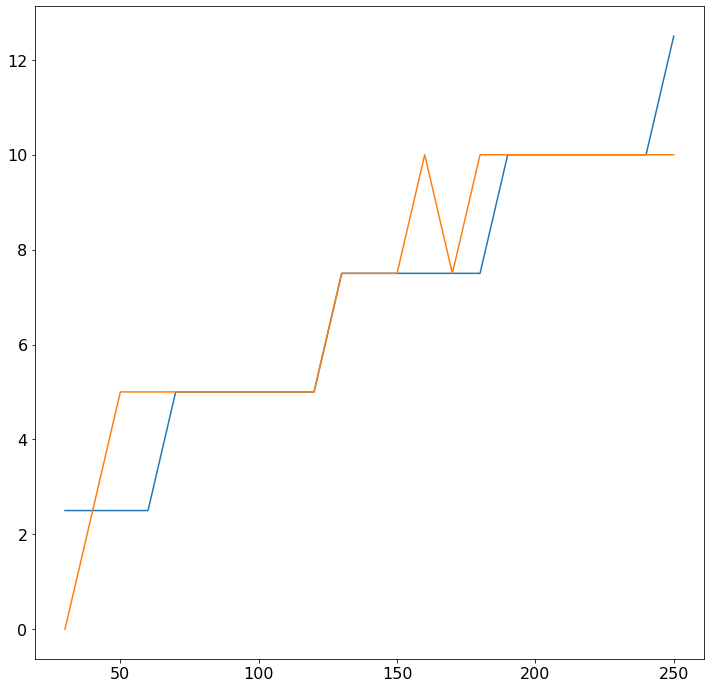

In [48]:
subjet_mass_peak_3_prongs = []
subjet_mass_peak_3_prongs_3q_cut = []
mass_bins = np.linspace(0, 100, 41)

for mp in mass_range:
    sj_mass = (
        events["fj_subjet2_mass"][
            (events["fj_genRes_mass"] == mp)
            # * (events["fj_pt"] >= 400)
            # * (events["fj_pt"] < 600)
            * (events["fj_nprongs"] == 3)
        ],
    )
    sj_mass_cut = (
        events["fj_subjet2_mass"][
            (events["fj_genRes_mass"] == mp)
            # * (events["fj_pt"] >= 400)
            # * (events["fj_pt"] < 600)
            * (events["fj_nprongs"] == 3)
            * (events["score_fj_H_VV_4q_3q"] > 0.3)
        ],
    )
    subjet_mass_peak_3_prongs.append(mass_bins[np.argmax(np.histogram(sj_mass, mass_bins)[0])])
    subjet_mass_peak_3_prongs_3q_cut.append(
        mass_bins[np.argmax(np.histogram(sj_mass_cut, mass_bins)[0])]
    )

plt.figure(figsize=(12, 12))
plt.plot(mass_range, subjet_mass_peak_3_prongs, label="Subjet2 mass peak")
plt.plot(mass_range, subjet_mass_peak_3_prongs_3q_cut, label="Subjet2 mass peak, 3q cut")
plt.savefig(f"{plot_dir}/{sig}_fj_subjet2_mass_peak_3_pronged.pdf")


In [49]:
mass_bins

array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,
        22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,
        45. ,  47.5,  50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,
        67.5,  70. ,  72.5,  75. ,  77.5,  80. ,  82.5,  85. ,  87.5,
        90. ,  92.5,  95. ,  97.5, 100. ])

In [47]:
np.histogram(sj_mass, mass_bins)[0]

array([  76,  778, 1229,  977,  575,  363,  220,  125,  102,   64,   40,
         40,    9,   10,   11,   17,   12,    7,    0,    2])

(array([1341., 1975.,  773.,  288.,  146.,   69.,   19.,   30.,   14.,
           3.]),
 array([  2.1035156,  11.949414 ,  21.795313 ,  31.64121  ,  41.48711  ,
         51.333008 ,  61.178905 ,  71.0248   ,  80.870705 ,  90.7166   ,
        100.5625   ], dtype=float32),
 <BarContainer object of 10 artists>)

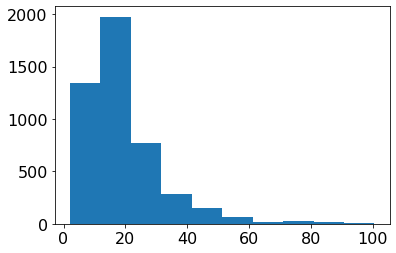

In [50]:
plt.hist(sj_mass)

In [44]:
np.histogram(sj_mass, mass_bins)

(array([3635,  874,  110,   38,    1,    0,    0,    0,    0,    0]),
 array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250.]))

In [43]:
subjet_mass_peak_3_prongs

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [38]:
mass_range

array([  0.        ,   3.16455696,   6.32911392,   9.49367089,
        12.65822785,  15.82278481,  18.98734177,  22.15189873,
        25.3164557 ,  28.48101266,  31.64556962,  34.81012658,
        37.97468354,  41.13924051,  44.30379747,  47.46835443,
        50.63291139,  53.79746835,  56.96202532,  60.12658228,
        63.29113924,  66.4556962 ,  69.62025316,  72.78481013,
        75.94936709,  79.11392405,  82.27848101,  85.44303797,
        88.60759494,  91.7721519 ,  94.93670886,  98.10126582,
       101.26582278, 104.43037975, 107.59493671, 110.75949367,
       113.92405063, 117.08860759, 120.25316456, 123.41772152,
       126.58227848, 129.74683544, 132.91139241, 136.07594937,
       139.24050633, 142.40506329, 145.56962025, 148.73417722,
       151.89873418, 155.06329114, 158.2278481 , 161.39240506,
       164.55696203, 167.72151899, 170.88607595, 174.05063291,
       177.21518987, 180.37974684, 183.5443038 , 186.70886076,
       189.87341772, 193.03797468, 196.20253165, 199.36

In [37]:
subjet_mass_peak_3_prongs

[3.1645569620253164,
 3.1645569620253164,
 3.1645569620253164,
 3.1645569620253164,
 6.329113924050633,
 6.329113924050633,
 6.329113924050633,
 6.329113924050633,
 6.329113924050633,
 6.329113924050633,
 6.329113924050633,
 6.329113924050633,
 9.49367088607595,
 9.49367088607595,
 9.49367088607595,
 9.49367088607595,
 9.49367088607595,
 9.49367088607595,
 9.49367088607595,
 9.49367088607595,
 12.658227848101266]